# 0. info
This script analyses lipidomics data from EC008.

In [1]:
import pandas, numpy, seaborn, umap

/Users/adrian/anaconda3/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/adrian/anaconda3/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/adrian/anaconda3/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWa

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 1. user-defined variables

In [4]:
intensity_file = '/Users/adrian/projects/vigur_tempo/data/lipidomics.2023.05.xx/EC008_Lipidomics_POS.txt'
metadata_file = '/Users/adrian/projects/vigur_tempo/data/lipidomics.2023.05.xx/EC-008 Sample ID dataframe_16032022.xlsx'

# 2. read information

## 2.1. read intensity information

In [5]:
# just read the file
df = pandas.read_csv(intensity_file, sep='\t', skiprows=4)

print(df.shape)
print(df.columns.to_list())
df.head()

(765, 126)
['Alignment ID', 'Average Rt(min)', 'Average Mz', 'Metabolite name', 'Adduct type', 'Post curation result', 'Fill %', 'MS/MS assigned', 'Reference RT', 'Reference m/z', 'Formula', 'Ontology', 'INCHIKEY', 'SMILES', 'Annotation tag (VS1.0)', 'RT matched', 'm/z matched', 'MS/MS matched', 'Comment', 'Manually modified for quantification', 'Manually modified for annotation', 'Isotope tracking parent ID', 'Isotope tracking weight number', 'Total score', 'RT similarity', 'Dot product', 'Reverse dot product', 'Fragment presence %', 'S/N average', 'Spectrum reference file name', 'MS1 isotopic spectrum', 'MS/MS spectrum', 'Solvent Blank_lipids_pos BLANK', 'Pool2_lipids_pos Pool', 'Solvent Blank_lipids_pos BLANK.1', '008-20 4', '008-11 24', '008-04 4', '008-18 0', '008-10 24', '008-13 24   CAT', 'Solvent Blank_lipids_pos BLANK.2', 'Pool2_lipids_pos Pool.1', 'Solvent Blank_lipids_pos BLANK.3', '008-03 0', '008-01 0', '008-21 4', '008-14 24   CAT', '008-16 0', '008-02 0', 'Solvent Blank_

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,4 CAT,24,24 CAT,BLANK.1,Pool.1,0.1,4.1,4 CAT.1,24.1,24 CAT.1
0,0,7.633,163.11206,Unknown,[M+H]+,found in higher mz's MsMs_359; found in higher...,1.000,True,NaN,NaN,...,2264.845595,2225.773465,2336.174452,71.556354,1211.545435,475.710191,437.670249,505.793224,632.150013,419.280312
1,1,1.085,171.13664,Unknown,[M+H]+,similar chromatogram in higher mz_46; found in...,0.650,True,NaN,NaN,...,807.915341,800.337351,695.348087,33.258858,225.381324,986.053369,1914.993835,442.227123,408.898737,348.029250
2,2,0.838,172.95811,Unknown,[M+H]+,found in higher mz's MsMs_3,0.613,True,NaN,NaN,...,842.943332,595.177599,540.026191,1.719332,178.470638,406.011974,470.560204,417.727936,230.712698,481.491940
3,3,0.839,174.95169,Unknown,[M+H]+,found in higher mz's MsMs_146,0.463,True,NaN,NaN,...,594.090112,377.490268,367.091603,2.603766,134.455770,245.759550,315.852311,260.987763,155.338515,357.837688
4,4,0.723,175.11690,Unknown,[M+H]+,found in higher mz's MsMs_170; found in higher...,0.300,True,NaN,NaN,...,296.820943,276.720135,308.240952,9.528764,72.371661,83.621492,102.969228,93.079455,108.698904,145.363560


In [6]:
# select the samples we need only
selected_columns = []
for column in df.columns:
    if '008' in column:
        selected_columns.append(column)
    if 'ool' in column:
        selected_columns.append(column)

selected_columns.sort()
selected_columns = ['Average Rt(min)'] + selected_columns
selected_columns = ['Average Mz'] + selected_columns

print(selected_columns)

['Average Mz', 'Average Rt(min)', '008-01 0', '008-02 0', '008-03 0', '008-04 4', '008-05 4', '008-06 4', '008-07 4 CAT', '008-08 4 CAT', '008-09 4 CAT', '008-10 24', '008-11 24', '008-12 24', '008-13 24   CAT', '008-14 24   CAT', '008-15 24   CAT', '008-16 0', '008-17 0', '008-18 0', '008-19 4', '008-20 4', '008-21 4', '008-22 4 CAT', '008-23 4 CAT', '008-24 4 CAT', '008-25 24', '008-26 24', '008-27 24', '008-28 24   CAT', '008-29 24   CAT', '008-30 24   CAT', '008-31 0', '008-32 0', '008-33 0', '008-34 4', '008-35 4', '008-36 4', '008-37 4 CAT', '008-38 4 CAT', '008-39 4 CAT', '008-40 24', '008-41 24', '008-42 24', '008-43 24   CAT', '008-44 24   CAT', '008-45 24   CAT', 'Pool', 'Pool.1', 'Pool1_pos Pool', 'Pool1_pos Pool.1', 'Pool1_pos Pool.2', 'Pool1_pos Pool.3', 'Pool1_pos Pool.4', 'Pool2_lipids_pos Pool', 'Pool2_lipids_pos Pool.1', 'Pool2_lipids_pos Pool.2', 'Pool2_lipids_pos Pool.3', 'Pool2_lipids_pos Pool.4', 'Pool2_pos Pool', 'Pool2_pos Pool.1', 'Pool2_pos Pool.2', 'Pool2_pos 

In [7]:
wdf = df[selected_columns]
print(wdf.shape)
wdf.head()

(765, 64)


,Average Mz,Average Rt(min),008-01 0,008-02 0,008-03 0,008-04 4,008-05 4,008-06 4,008-07 4 CAT,008-08 4 CAT,...,Pool2_lipids_pos Pool,Pool2_lipids_pos Pool.1,Pool2_lipids_pos Pool.2,Pool2_lipids_pos Pool.3,Pool2_lipids_pos Pool.4,Pool2_pos Pool,Pool2_pos Pool.1,Pool2_pos Pool.2,Pool2_pos Pool.3,Pool2_pos Pool.4
0,163.11206,7.633,2616,2128,2913,3265,2352,2184,1935,2562,...,1614,1614,1614,1614,1614,3139,3139,3139,3139,3139
1,171.13664,1.085,3516,964,1531,511,6247,763,1159,1769,...,804,804,804,804,804,578,578,578,578,578
2,172.95811,0.838,34,23,17,27,39,567,1273,1343,...,405,405,405,405,405,706,706,706,706,706
3,174.95169,0.839,26,11,15,38,46,364,897,940,...,212,379,288,337,257,473,473,473,473,473
4,175.11690,0.723,323,193,47,55,352,113,143,228,...,217,291,244,355,204,366,366,366,366,366


In [8]:
# merge mz and RT as unique identifier
wdf.loc[:, 'unique_ID'] = wdf.loc[:, 'Average Rt(min)'].astype(str) + '_' + wdf.loc[:, 'Average Mz'].astype(str)
wdf.drop(['Average Mz', 'Average Rt(min)'], axis='columns', inplace=True)
wdf.set_index('unique_ID', inplace=True)
wdf.sort_index(inplace=True)

print(wdf.shape)
wdf.head()

(765, 62)


/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_20725/842306645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf.loc[:, 'unique_ID'] = wdf.loc[:, 'Average Rt(min)'].astype(str) + '_' + wdf.loc[:, 'Average Mz'].astype(str)
/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_20725/842306645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf.drop(['Average Mz', 'Average Rt(min)'], axis='columns', inplace=True)
/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_20725/842306645.py:5: SettingWithCopyWarning: 
A value is trying to b

,008-01 0,008-02 0,008-03 0,008-04 4,008-05 4,008-06 4,008-07 4 CAT,008-08 4 CAT,008-09 4 CAT,008-10 24,...,Pool2_lipids_pos Pool,Pool2_lipids_pos Pool.1,Pool2_lipids_pos Pool.2,Pool2_lipids_pos Pool.3,Pool2_lipids_pos Pool.4,Pool2_pos Pool,Pool2_pos Pool.1,Pool2_pos Pool.2,Pool2_pos Pool.3,Pool2_pos Pool.4
unique_ID,,,,,,,,,,,,,,,,,,,,,
0.601_415.26578,15011,1155,7612,375,7137,692,656,1251,63,494,...,3215,3215,3215,3215,3215,325,353,254,266,32
0.603_275.12033,514,140,2068,142,529,73,30,264,40,19,...,362,362,362,362,362,166,259,141,174,150
0.604_525.30212,2918,654,1285,169,4614,278,303,840,25,216,...,1991,1991,1991,1991,1991,351,351,351,351,351
0.605_311.12711,9,184,45,91,8,84,182,405,432,65,...,74,162,333,461,291,547,547,547,547,547
0.605_481.26865,4658,790,2059,204,6171,387,358,1239,41,300,...,2679,2679,2679,2679,2679,397,555,475,490,532


## 2.2. read cell numbers and adjust intensities
This step is not necessary if we perform quantile normalization.

In [9]:
metadata = pandas.read_excel(metadata_file, sheet_name='Sampledata_POS_Combine')
metadata

,Sample,Label,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
0,PMUEC_INTRA_EC008_103,Pool1_pos,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
1,PMUEC_INTRA_EC008_104,Pool1_pos,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
2,PMUEC_INTRA_EC008_105,Pool1_pos,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
3,PMUEC_INTRA_EC008_107,Pool2_pos,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
4,PMUEC_INTRA_EC008_109,008-02_pos,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PMUEC_INTRA_EC008_243,A312_pos,A312_neg,4,4,0,1,0,0,300000,HILIC_POS_10min,33,2
70,PMUEC_INTRA_EC008_244,A348_pos,A348_neg,4,4,0,1,0,10,300000,HILIC_POS_10min,34,2
71,PMUEC_INTRA_EC008_245,008-33_pos,008-33,3,0,0,3,0,0,25000,HILIC_POS_10min,35,2
72,PMUEC_INTRA_EC008_246,008-40_pos,008-40,3,24,0,1,0,0,40000,HILIC_POS_10min,36,2


In [10]:
cell_numbers = metadata.loc[:, 'cell number'].to_list()
cell_numbers = [float(element) for element in cell_numbers if element != '-']
median_cell_numbers = numpy.median(cell_numbers)
print(median_cell_numbers)

62000.0


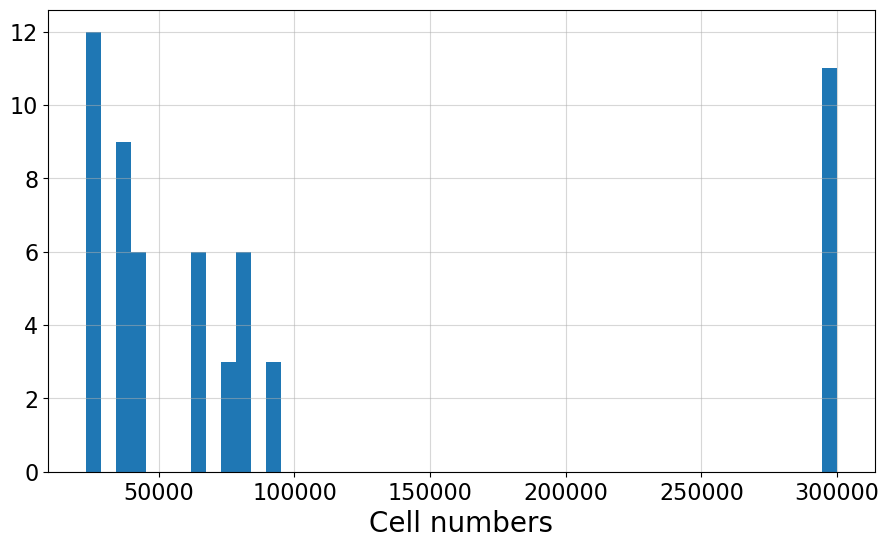

In [11]:
matplotlib.pyplot.hist(cell_numbers, bins=50)

matplotlib.pyplot.xlabel('Cell numbers')

matplotlib.pyplot.grid(':', alpha=0.5)
matplotlib.pyplot.show()

# 3. check the distribution of CV of features in pools

In [12]:
#
# need to follow up with Ottar
#
# consider removeing any feature whose CV is higher than 30% across the pools plot distribution

In [13]:
pools = [element for element in wdf.columns if 'Pool' in element or 'Pool' in element]
pools.sort()
print(pools)
pool_df = wdf[pools]
pool_df.head()

['Pool', 'Pool.1', 'Pool1_pos Pool', 'Pool1_pos Pool.1', 'Pool1_pos Pool.2', 'Pool1_pos Pool.3', 'Pool1_pos Pool.4', 'Pool2_lipids_pos Pool', 'Pool2_lipids_pos Pool.1', 'Pool2_lipids_pos Pool.2', 'Pool2_lipids_pos Pool.3', 'Pool2_lipids_pos Pool.4', 'Pool2_pos Pool', 'Pool2_pos Pool.1', 'Pool2_pos Pool.2', 'Pool2_pos Pool.3', 'Pool2_pos Pool.4']


,Pool,Pool.1,Pool1_pos Pool,Pool1_pos Pool.1,Pool1_pos Pool.2,Pool1_pos Pool.3,Pool1_pos Pool.4,Pool2_lipids_pos Pool,Pool2_lipids_pos Pool.1,Pool2_lipids_pos Pool.2,Pool2_lipids_pos Pool.3,Pool2_lipids_pos Pool.4,Pool2_pos Pool,Pool2_pos Pool.1,Pool2_pos Pool.2,Pool2_pos Pool.3,Pool2_pos Pool.4
unique_ID,,,,,,,,,,,,,,,,,
0.601_415.26578,1354.782967,1371.610640,603,603,603,603,603,3215,3215,3215,3215,3215,325,353,254,266,32
0.603_275.12033,336.833851,127.595019,471,471,471,471,471,362,362,362,362,362,166,259,141,174,150
0.604_525.30212,858.976582,834.668183,50,380,429,214,100,1991,1991,1991,1991,1991,351,351,351,351,351
0.605_311.12711,566.667024,276.290625,889,889,889,889,889,74,162,333,461,291,547,547,547,547,547
0.605_481.26865,1172.338168,1112.178825,98,645,570,247,182,2679,2679,2679,2679,2679,397,555,475,490,532


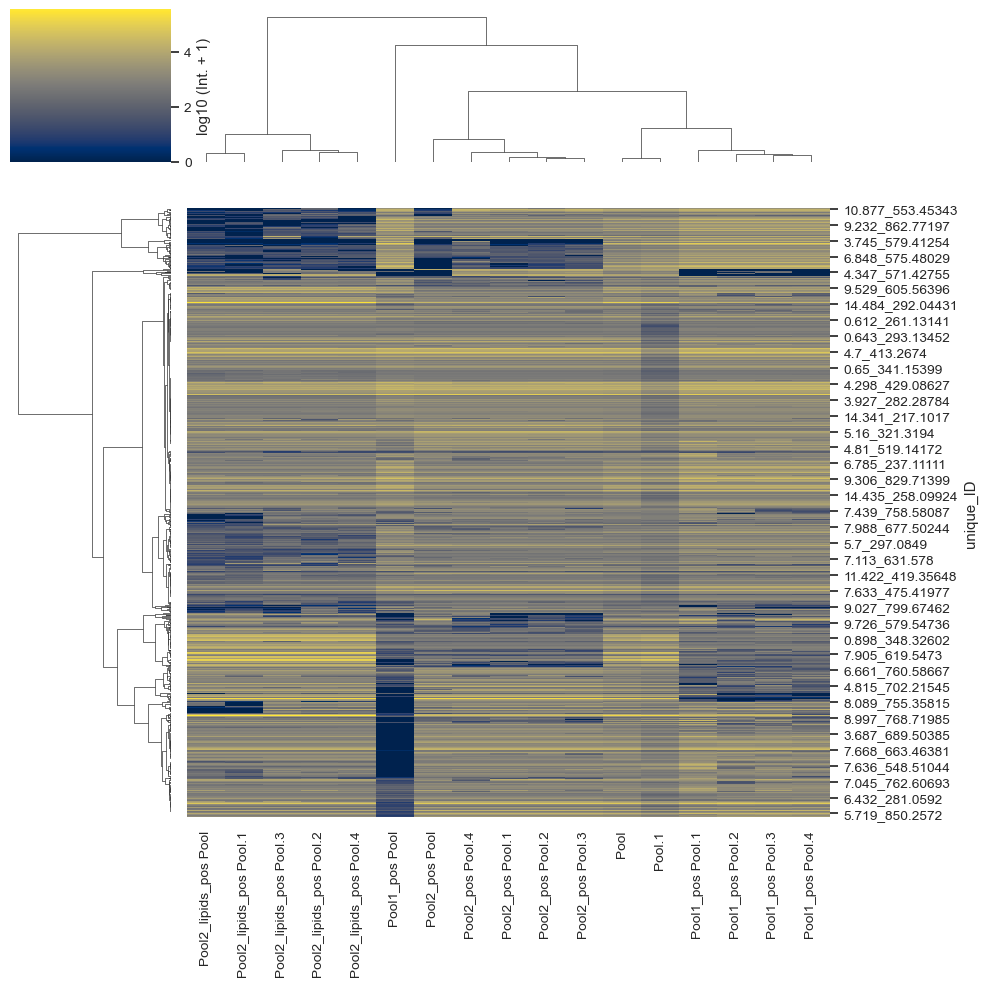

In [14]:
linkage_method = 'ward'
distance_metric = 'cosine'

seaborn.set(font_scale=0.9)
seaborn.clustermap(numpy.log10(pool_df + 1), 
                   cmap='cividis', 
                   row_cluster=True, col_cluster=True,
                   method=linkage_method, metric=distance_metric, 
                   cbar_kws={'label':'log10 (Int. + 1)'}
                  )
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# 4. quantile normalization

In [15]:
working_samples = [element for element in wdf.columns if '008' in element]
log10_intensities = numpy.log10(wdf[working_samples] + 1)
print(log10_intensities.shape)

# remove any feature that does not cross the threshold of 300
log10_intensities = log10_intensities[log10_intensities.max(axis=1) >= numpy.log10(300 + 1)]
print(log10_intensities.shape)
log10_intensities.head()

(765, 45)
(763, 45)


,008-01 0,008-02 0,008-03 0,008-04 4,008-05 4,008-06 4,008-07 4 CAT,008-08 4 CAT,008-09 4 CAT,008-10 24,...,008-36 4,008-37 4 CAT,008-38 4 CAT,008-39 4 CAT,008-40 24,008-41 24,008-42 24,008-43 24 CAT,008-44 24 CAT,008-45 24 CAT
unique_ID,,,,,,,,,,,,,,,,,,,,,
0.601_415.26578,4.176439,3.062958,3.881556,2.575188,3.853577,2.840733,2.817565,3.097604,1.806180,2.694605,...,1.579784,2.287802,1.556303,2.648360,1.763428,1.991226,2.534026,3.253096,1.869232,2.572872
0.603_275.12033,2.711807,2.149219,3.315760,2.155336,2.724276,1.869232,1.491362,2.423246,1.612784,1.301030,...,1.826075,2.113943,1.477121,1.505150,0.778151,2.053078,2.201397,3.186108,2.133539,2.103804
0.604_525.30212,3.465234,2.816241,3.109241,2.230449,3.664172,2.445604,2.482874,2.924796,1.414973,2.336460,...,0.602060,2.540329,1.643453,1.913814,1.380211,2.008600,2.660865,3.177248,1.973128,2.706718
0.605_311.12711,1.000000,2.267172,1.662758,1.963788,0.954243,1.929419,2.262451,2.608526,2.636488,1.819544,...,2.505150,3.003891,2.976350,2.808211,2.870404,2.957607,2.941511,3.026533,2.841985,2.956649
0.605_481.26865,3.668293,2.898176,3.313867,2.311754,3.790426,2.588832,2.555094,3.093422,1.623249,2.478566,...,1.698970,2.551450,2.509203,2.908485,2.593286,2.462398,2.724276,3.331225,2.350248,2.781037


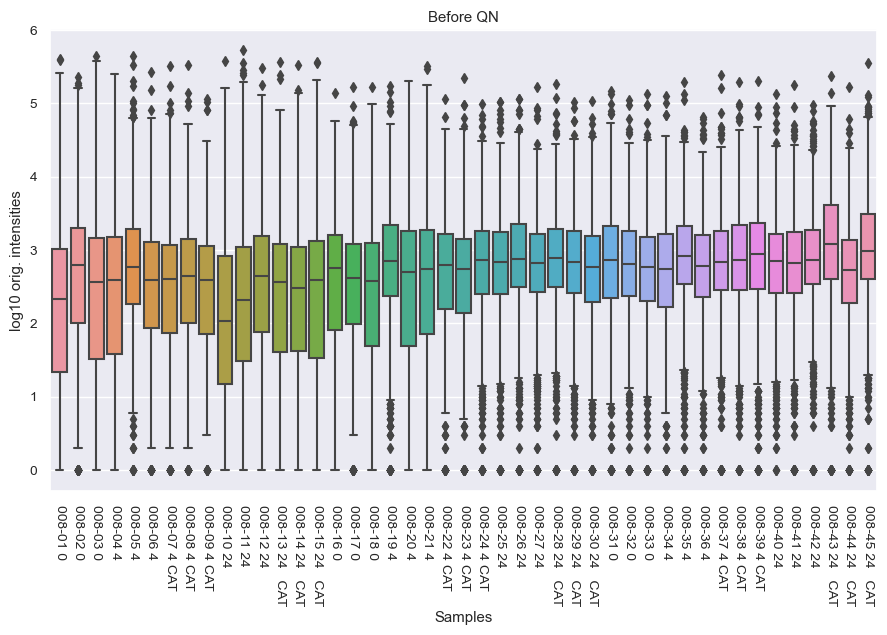

In [16]:
g = seaborn.boxplot(data=log10_intensities)
g.set(ylabel='log10 orig. intensities', xlabel='Samples', title='Before QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=10)
matplotlib.pyplot.show()

variance explained [0.29586615 0.09871328]
(45, 2)


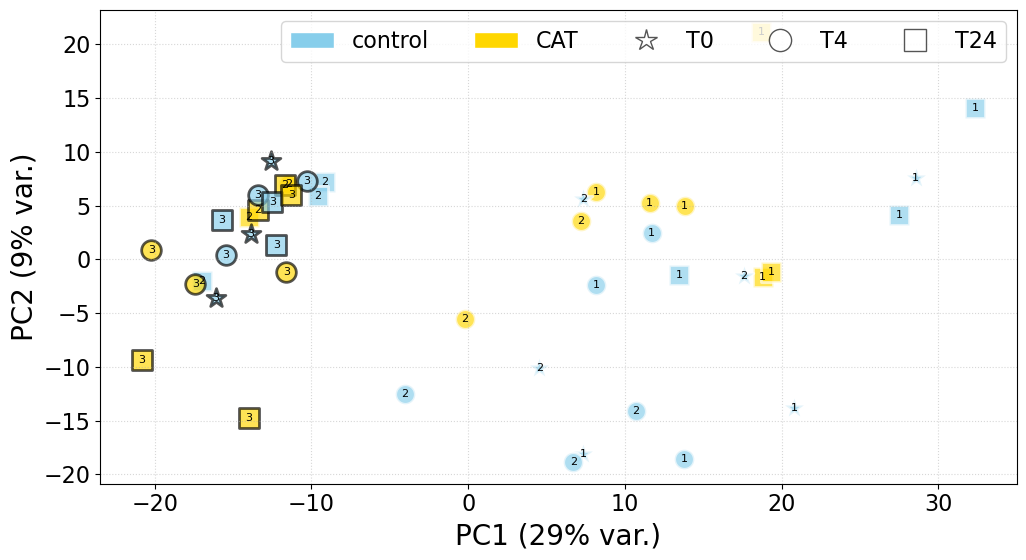

In [17]:
# PCA before QN
matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

df = log10_intensities.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(df)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

for i in range(len(df.index)):
    
    label = df.index[i].split()
    
    # color for treatment
    if label[-1] == 'CAT':
        plotting_color = 'gold'
    else:
        plotting_color = 'skyblue'
    
    # marker for time
    if label[1] == '0':
        plotting_marker = '*'
    elif label[1] == '4':
        plotting_marker = 'o'
    elif label[1] == '24':
        plotting_marker = 's'
    else:
        pass

    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']
        
    # add biological replicate
    new_label = label[0].split('-')[0] + '-' + str(int(label[0].split('-')[1]))
    biorep = metadata[metadata['Sample ID'] == new_label]['BioReplicate'].values[0]
    matplotlib.pyplot.text(posx, posy, biorep, 
                           fontsize=8, horizontalalignment='center', verticalalignment='center')
    
    # add batch
    batch_number = metadata[metadata['Sample ID'] == new_label]['Sample'].values[0].split('_')[-1][0]
    if batch_number == '1':
        the_edge_color = 'white'
    elif batch_number == '2':
        the_edge_color = 'black'
    else:
        print('Error finding batch number')

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, 
                              s=200, 
                              c=plotting_color, alpha=2/3, 
                              ec=the_edge_color, marker=plotting_marker, lw=2)
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'CAT', 'T0', 'T4', 'T24'], ncol=5, fontsize=16)

# close figure
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [18]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log10_intensities.values, axis=0), 
                             index=log10_intensities.index, 
                             columns=log10_intensities.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log10_intensities.rank(method="min").stack().astype(int).map(df_mean).unstack()

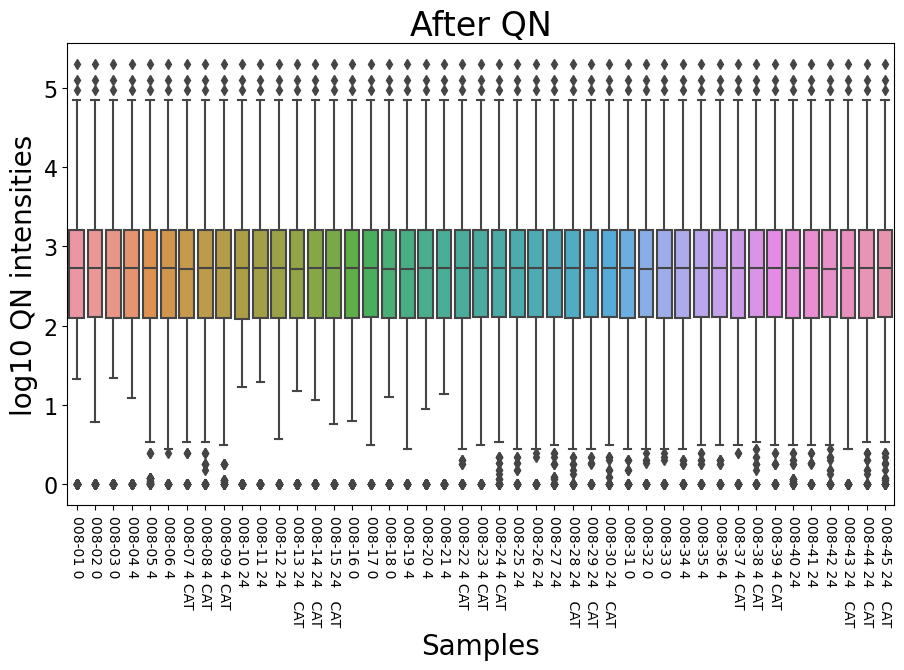

In [19]:
# plot intensities after QN
g = seaborn.boxplot(data=df_qn)
g.set(ylabel='log10 QN intensities', xlabel='Samples', title='After QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=10)
matplotlib.pyplot.show()

# 5. visualize samples

## 5.1. PCA

In [20]:
tqndf = df_qn.transpose()

In [21]:
x = sklearn.preprocessing.StandardScaler().fit_transform(tqndf)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

variance explained [0.24501156 0.11368171]
(45, 2)


,PC1,PC2
0,23.390585,-1.062401
1,5.138047,19.411738
2,14.335514,15.228592
3,8.515908,17.362153
4,10.720288,5.729303


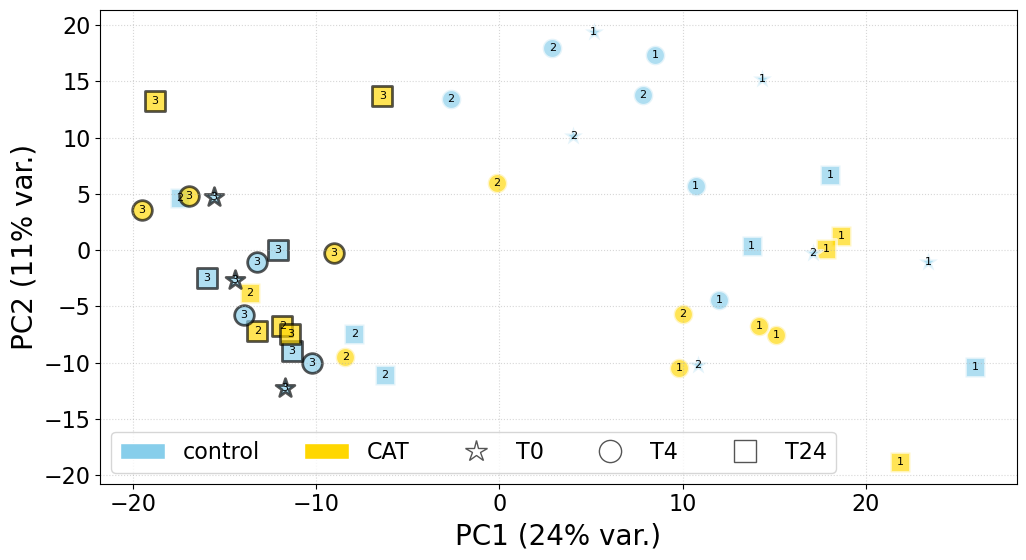

In [22]:
matplotlib.rc_file_defaults()
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

for i in range(len(tqndf.index)):
    
    label = tqndf.index[i].split()
    
    # color for treatment
    if label[-1] == 'CAT':
        plotting_color = 'gold'
    else:
        plotting_color = 'skyblue'
    
    # marker for time
    if label[1] == '0':
        plotting_marker = '*'
    elif label[1] == '4':
        plotting_marker = 'o'
    elif label[1] == '24':
        plotting_marker = 's'
    else:
        pass

    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']
        
    # add biological replicate
    new_label = label[0].split('-')[0] + '-' + str(int(label[0].split('-')[1]))
    biorep = metadata[metadata['Sample ID'] == new_label]['BioReplicate'].values[0]
    matplotlib.pyplot.text(posx, posy, biorep, 
                           fontsize=8, horizontalalignment='center', verticalalignment='center')
    
    # add batch
    batch_number = metadata[metadata['Sample ID'] == new_label]['Sample'].values[0].split('_')[-1][0]
    if batch_number == '1':
        the_edge_color = 'white'
    elif batch_number == '2':
        the_edge_color = 'black'
    else:
        print('Error finding batch number')

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, 
                              s=200, 
                              c=plotting_color, alpha=2/3, 
                              ec=the_edge_color, marker=plotting_marker, lw=2)
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'CAT', 'T0', 'T4', 'T24'], ncol=5, fontsize=16)

# close figure
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [23]:
pca.explained_variance_ratio_[0]

0.2450115559754335

In [24]:
#are they batches? take it from metadata file color them

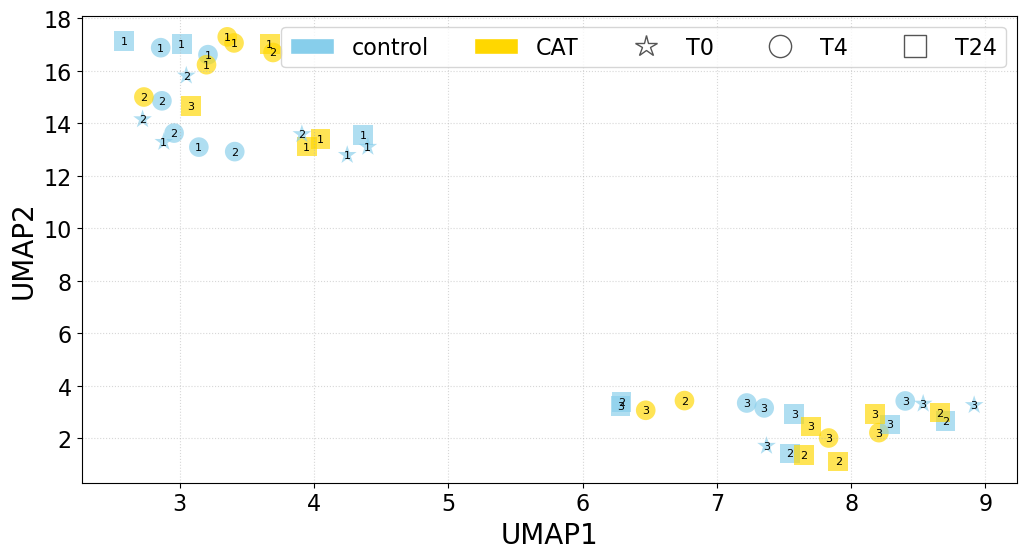

In [25]:
# umap
reducer = umap.UMAP(metric='cosine', n_neighbors=5, min_dist=0.1, random_state=17)
umap_embedding = reducer.fit_transform(tqndf)

for i in range(len(tqndf.index)):
    
    label = tqndf.index[i].split()
    
    # color for treatment
    if label[-1] == 'CAT':
        plotting_color = 'gold'
    else:
        plotting_color = 'skyblue'
    
    # marker for time
    if label[1] == '0':
        plotting_marker = '*'
    elif label[1] == '4':
        plotting_marker = 'o'
    elif label[1] == '24':
        plotting_marker = 's'
    else:
        pass

    # position
    posx = umap_embedding[i][0]
    posy = umap_embedding[i][1]

    # plot
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=2/3, ec=None, marker=plotting_marker)
    
    # add biological replicate
    new_label = label[0].split('-')[0] + '-' + str(int(label[0].split('-')[1]))
    biorep = metadata[metadata['Sample ID'] == new_label]['BioReplicate'].values[0]
    matplotlib.pyplot.text(posx, posy, biorep, fontsize=8, horizontalalignment='center', verticalalignment='center')

# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='skyblue', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='gold', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'CAT', 'T0', 'T4', 'T24'], ncol=5, fontsize=16)

# close figure
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('UMAP1')
matplotlib.pyplot.ylabel('UMAP2')

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# 6. define response features
Make first a df of log2 FC at four and 24 hours, just two variables!

Define early, late and consistent responders.

Rules for response: 
- effect |log2 FC| > 1 and min(intensity) > 100

In [26]:
metadata

,Sample,Label,Sample ID,BioReplicate,Timepoint,µM catech,TecRep,TNFalpha,LPS,cell number,LCMS Method,LCMS Analytical Order,LCMS BATCH
0,PMUEC_INTRA_EC008_103,Pool1_pos,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,1,1
1,PMUEC_INTRA_EC008_104,Pool1_pos,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,2,1
2,PMUEC_INTRA_EC008_105,Pool1_pos,Pool1_pos,-,-,-,-,-,-,-,HILIC_POS_10min,3,1
3,PMUEC_INTRA_EC008_107,Pool2_pos,Pool2_pos,-,-,-,-,-,-,-,HILIC_POS_10min,4,1
4,PMUEC_INTRA_EC008_109,008-02_pos,008-2,1,0,0,2,0,0,80000,HILIC_POS_10min,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PMUEC_INTRA_EC008_243,A312_pos,A312_neg,4,4,0,1,0,0,300000,HILIC_POS_10min,33,2
70,PMUEC_INTRA_EC008_244,A348_pos,A348_neg,4,4,0,1,0,10,300000,HILIC_POS_10min,34,2
71,PMUEC_INTRA_EC008_245,008-33_pos,008-33,3,0,0,3,0,0,25000,HILIC_POS_10min,35,2
72,PMUEC_INTRA_EC008_246,008-40_pos,008-40,3,24,0,1,0,0,40000,HILIC_POS_10min,36,2


In [27]:
timepoints = [4, 24]
replicates = [1, 2, 3]
fcdf = pandas.DataFrame()

for time in timepoints:
    
    fold_changes = []
    
    for replicate in replicates:
        
        #
        # select samples in data
        #
        rule_control = (metadata['Timepoint'] == time) & (metadata['BioReplicate'] == replicate) & (metadata['µM catech'] == 0)
        rule_treatment = (metadata['Timepoint'] == time) & (metadata['BioReplicate'] == replicate) & (metadata['µM catech'] == 5)

        #print(time, replicate)
        #print(metadata[rule_control]['Sample ID'].values)
        #print(metadata[rule_treatment]['Sample ID'].values)
        
        labels_control = [label.split('-')[0]+'-'+'{:02d}'.format(int(label.split('-')[1])) for label in metadata[rule_control]['Sample ID'].values]
        labels_treatment = [label.split('-')[0]+'-'+'{:02d}'.format(int(label.split('-')[1])) for label in metadata[rule_treatment]['Sample ID'].values]
        
        #print(labels_control)
        #print(labels_treatment)
        
        working_labels_control = []
        for label in labels_control:
            for colname in df_qn.columns:
                if label in colname:
                    working_labels_control.append(colname)
        working_labels_treatment = []
        for label in labels_treatment:
            for colname in df_qn.columns:
                if label in colname:
                    working_labels_treatment.append(colname)
        #print(working_labels_control)
        #print(working_labels_treatment)
        
        #
        # iterate lipid features
        #
        info = {}
        for featureID in df_qn.index:
            intensities_control = df_qn.loc[featureID, working_labels_control].median()
            intensities_treatment = df_qn.loc[featureID, working_labels_treatment].median()
            
            fc = (10**intensities_treatment) / (10**intensities_control)
            log2fc = numpy.log2(fc)
            
            
            #print(featureID)
            #print(intensities_control)
            #print(intensities_treatment)
            #print(fc)
            #print(log2fc)
            #print()
            
            info[featureID] = log2fc
            
        #
        # bring each replicate to a df
        #
        current_label = 'T{}_BR{}'.format(time, replicate)
        fcdf[current_label] = pandas.Series(info)            
        
        
        


In [28]:
fcdf

,T4_BR1,T4_BR2,T4_BR3,T24_BR1,T24_BR2,T24_BR3
0.601_415.26578,0.054776,0.145262,1.250050,-0.359878,-0.326504,1.081163
0.603_275.12033,-2.209552,0.386777,-0.346478,0.122472,-0.863198,1.279081
0.604_525.30212,0.137023,-0.664495,0.021638,-1.077387,0.915250,1.713074
0.605_311.12711,1.948648,0.243377,1.731387,-3.644873,0.667519,-0.359326
0.605_481.26865,-0.122573,0.885708,2.225206,0.766034,-0.219748,0.172300
...,...,...,...,...,...,...
9.884_936.90509,1.286341,-1.101992,-0.280599,-1.819478,-0.727319,-0.176279
9.885_677.63702,-0.597631,1.042233,-3.378143,-0.678552,-2.492031,-1.700749
9.886_950.91608,1.057865,3.028542,-1.150106,0.072260,1.659457,0.204485
9.89_663.6192,-1.334122,0.097497,-0.784847,-0.725824,-1.266885,-0.084899


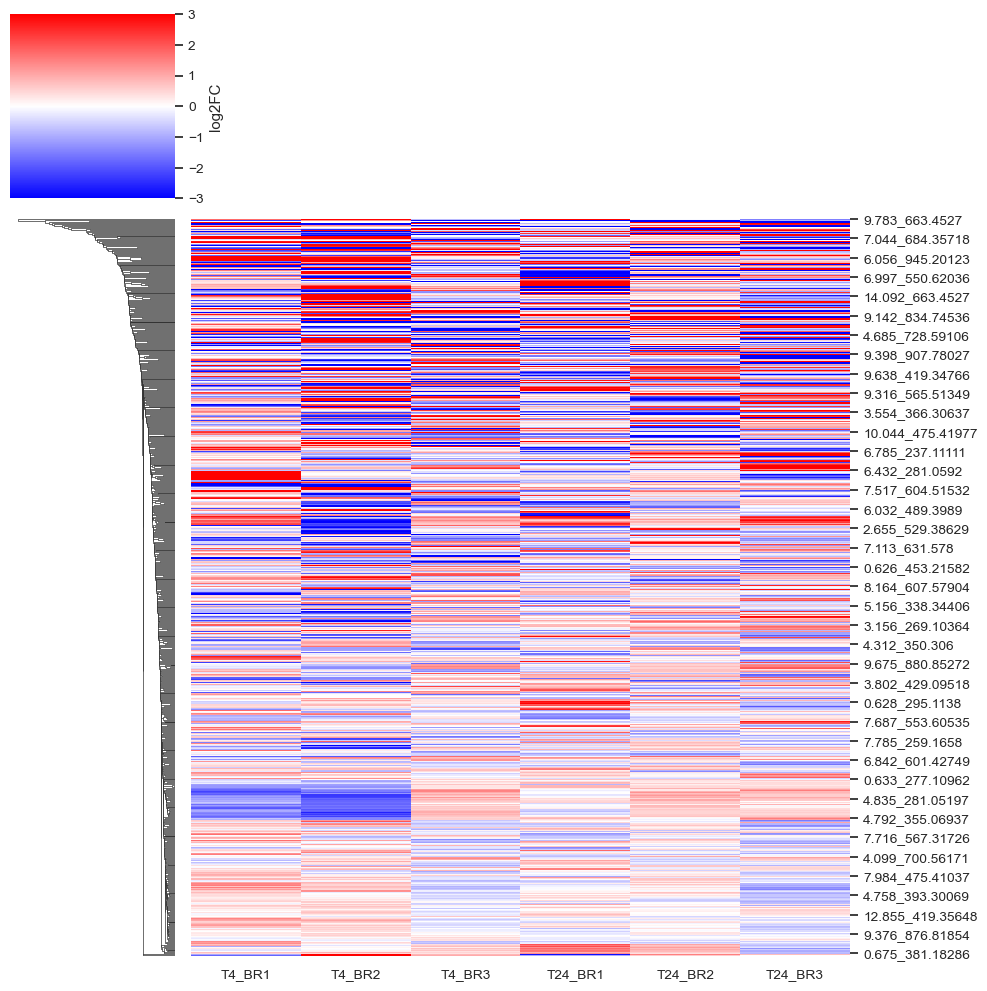

In [29]:
# generate the figure with metabolite names
linkage_method = 'single'
distance_metric = 'euclidean'

seaborn.set(font_scale=0.9)
seaborn.clustermap(fcdf, 
                   cmap='bwr', 
                   row_cluster=True, col_cluster=False,
                   vmin=-3, vmax=3,
                   method=linkage_method, metric=distance_metric, 
                   cbar_kws={'label':'log2FC'}
                  )

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [30]:
Plot the log2FC distributions, decide on appropriate thresholds. consider n-1 replicates
plot scatter plot of 4 and 24 hours
perform tests statistical



SyntaxError: invalid syntax (2096432321.py, line 1)

In [ ]:
DG and LPC are expected to be there

In [ ]:
exclude anything below one minute. Make a plot and share with ottar. number of metabolites per time histogram

In [ ]:
log10_intensities.index[:50]